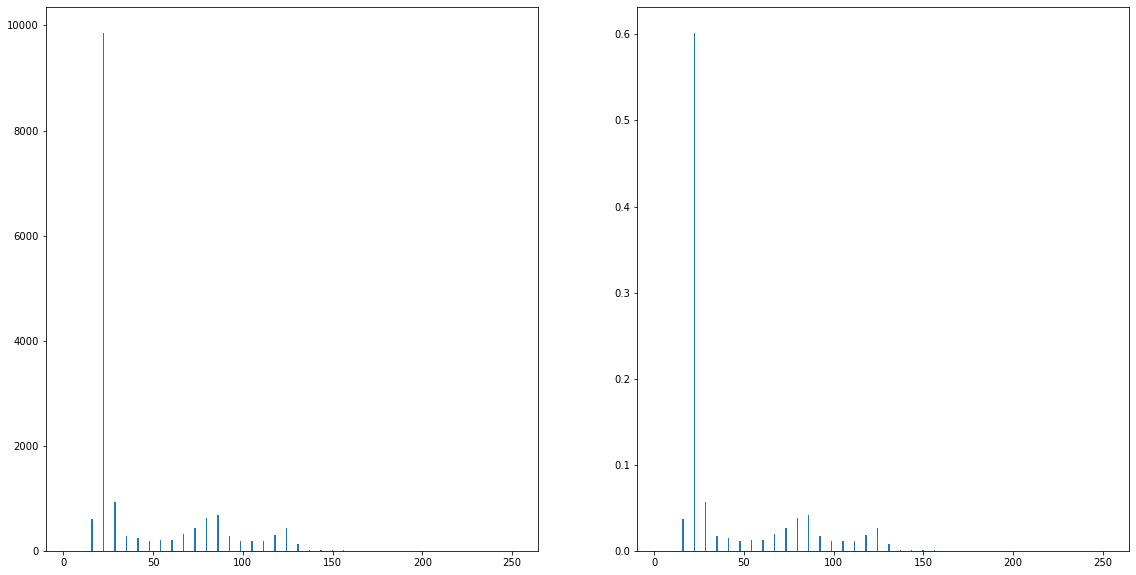

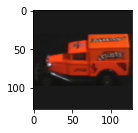

In [1]:
# import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt

import histogram_module
import dist_module
import gauss_module
import match_module
#import rpc_module



def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray






## gray-value histograms (Question 2.a)

img_color = np.array(Image.open('./model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0, 255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

plt.subplot(1,3,2)
hist_gray2, bin_gray2 = histogram_module.normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)
plt.show()

plt.subplot(1,3,3)
plt.imshow(img_color)

In [2]:
vector = img_color.reshape(img_color.shape[0]*img_color_double.shape[1], 3)
true_bins = np.arange(0, 255, 51)
hists = np.zeros((num_bins, num_bins, num_bins))

NameError: name 'img_color_double' is not defined

In [15]:
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    img_vector = img_gray.reshape(img_gray.size)

    n = 255 / num_bins
    hists = np.zeros(num_bins)

    for el in img_vector:

        if el == 255:
            k = num_bins - 1
        else:
            k = int(el // n)

        hists[k] += 1

    hists = hists / hists.sum()
    bins = np.arange(0, 256, n)

    return hists, bins


def rgb_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'

    n = 255/num_bins

    vector_image = img_color_double.reshape(img_color_double.shape[0] * img_color_double.shape[1], 3)

    true_bins = np.arange(0, 255, n)

    #Define a 3D histogram  with "num_bins^3" number of entries
    hists = np.zeros((num_bins, num_bins, num_bins))
    
    # Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0] * img_color_double.shape[1]):

        for j in range(len(vector_image[i])):

            if vector_image[i, j] == 255:
                k = num_bins - 1
            else:
                k = int(vector_image[i, j] // n)

            if j == 0:
                R = k
            elif j == 1:
                G = k
            else:
                B = k

        hists[R, G, B] += 1

        pass


    #Normalize the histogram such that its integral (sum) is equal 1
    hists = hists / hists.sum()

    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists

def rg_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'

    n = 255/num_bins

    vector_image = img_color_double.reshape(img_color_double.shape[0] * img_color_double.shape[1], 3)
    true_bins = np.arange(0, 255, n)

    # Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))

    for i in range(img_color_double.shape[0] * img_color_double.shape[1]):

        for j in range(len(vector_image[i])):

            if vector_image[i, j] == 255:
                k = num_bins - 1
            else:
                k = int(vector_image[i, j] // n)

            if j == 0:
                R = k
            elif j == 1:
                G = k

        hists[R, G] += 1

    hists = hists / hists.sum()

    # Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)

    return hists
def dxdy_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'


    #.....your code here
    n_of_integers = list(range(-6, 7))
    #n = len(n_of_integers) / num_bins
    n = 12/num_bins
    true_bins = np.arange(-6, 6, n)
    true_bins[-1] = 6.0

    [imgDx, imgDy] = gauss_module.gaussderiv(img_gray, 3.0)
    vector_imgDx = imgDx.reshape(imgDx.size)
    vector_imgDy = imgDy.reshape(imgDy.size)

    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))


    #... (your code here)
    for i in range(imgDx.size):
        #for j, threshold in enumerate(true_bins):
        if vector_imgDx[i] >= 6:
            kx = num_bins - 1
            #elif vector_imgDx[i] >= threshold and vector_imgDx[i] < threshold + n:
                #kx = j
        else:
            kx = int((vector_imgDx[i] + 6) // n)
            
        if vector_imgDy[i] >= 6:
            ky = num_bins - 1
            #elif vector_imgDy[i] >= threshold and vector_imgDy[i] < threshold + n:
                #ky = j
        else:
            ky = int((vector_imgDy[i] + 6) // n)
        print(vector_imgDx[i], vector_imgDy[i], n)
    
        hists[kx, ky] += 1

    hists = hists / hists.sum()

    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists

def is_grayvalue_hist(hist_name):
    if hist_name == 'grayvalue' or hist_name == 'dxdy':
        return True
    elif hist_name == 'rgb' or hist_name == 'rg':
        return False
    else:
        assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
    if hist_name == 'grayvalue':
        return normalized_hist(img, num_bins_gray)
    elif hist_name == 'rgb':
        return rgb_hist(img, num_bins_gray)
    elif hist_name == 'rg':
        return rg_hist(img, num_bins_gray)
    elif hist_name == 'dxdy':
        return dxdy_hist(img, num_bins_gray)
    else:
        assert False, 'unknown distance: %s'%hist_name

In [ ]:
image_files1 = ['./model/obj1__0.png']
image_files2 = ['./model/obj91__0.png', './model/obj94__0.png']

plt.figure()
plt.subplot(1,3,1); plt.imshow(np.array(Image.open(image_files1[0])), vmin=0, vmax=255); plt.title(image_files1[0])
plt.subplot(1,3,2); plt.imshow(np.array(Image.open(image_files2[0])), vmin=0, vmax=255); plt.title(image_files2[0])
plt.subplot(1,3,3); plt.imshow(np.array(Image.open(image_files2[1])), vmin=0, vmax=255); plt.title(image_files2[1])
plt.show()

img1_color = np.array(Image.open(image_files1[0]))
img2_color = np.array(Image.open(image_files2[0]))
num_bins_color = 30
hist1_rgb = histogram_module.rgb_hist(img1_color.astype('double'), num_bins_color)
hist2_rgb = histogram_module.rgb_hist(img2_color.astype('double'), num_bins_color)

print('Distance according to dist_l2 %f'% dist_module.dist_l2(hist1_rgb,hist2_rgb))
print('Distance according to dist_interset %f'% dist_module.dist_intersect(hist1_rgb,hist2_rgb))
print('Distance according to dist_chi2 %f'% dist_module.dist_chi2(hist1_rgb,hist2_rgb))


distance_types = ['l2', 'intersect', 'chi2']
print('distance functions:', distance_types)

hist_types = ['grayvalue', 'rgb', 'rg', 'dxdy']
print('histogram types:', hist_types)

num_bins_color = 30;
num_bins_gray = 90;

for img1_file in image_files1:
    img1_color = np.array(Image.open(img1_file))
    img1_color = img1_color.astype('double')
    img1_gray = rgb2gray(img1_color)
    
    for img2_file in image_files2:
        img2_color = np.array(Image.open(img2_file))
        img2_color = img2_color.astype('double')
        img2_gray = rgb2gray(img2_color)
    
        D = np.zeros( (len(distance_types),len(hist_types)) )
    
        for didx in range(len(distance_types)):
    
            for hidx in range(len(hist_types)):
    
                if histogram_module.is_grayvalue_hist(hist_types[hidx]):
                    hist1 = histogram_module.get_hist_by_name(img1_gray, num_bins_gray, hist_types[hidx])
                    hist2 = histogram_module.get_hist_by_name(img2_gray, num_bins_gray, hist_types[hidx])
            
                else:
                    hist1 = histogram_module.get_hist_by_name(img1_color, num_bins_color, hist_types[hidx])
                    hist2 = histogram_module.get_hist_by_name(img2_color, num_bins_color, hist_types[hidx])
    
                if len(hist1) == 2:
                    hist1 = hist1[0]
                if len(hist2) == 2:
                    hist2 = hist2[0]
    
                D[didx, hidx] = dist_module.get_dist_by_name(hist1, hist2, distance_types[didx])
         
        print('Comparison of images "%s" to "%s":'% (img1_file, img2_file))
        print(D)
        print('\n')


print('Legend:')
print('%s-%s, %s-%s, %s-%s, %s-%s'%('l2', 'grayvalue', 'l2', 'rgb', 'l2', 'rg', 'l2', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('intersect', 'grayvalue', 'intersect', 'rgb', 'intersect', 'rg', 'intersect', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('chi2', 'grayvalue', 'chi2', 'rgb', 'chi2', 'rg', 'chi2', 'dxdy'))

In [5]:
with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images]

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

dist_type = 'intersect';
hist_type = 'rg';
num_bins = 30;

In [6]:
def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
    hist_isgray = histogram_module.is_grayvalue_hist(hist_type)
    
    model_hists = compute_histograms(model_images, hist_type, hist_isgray, num_bins)
    query_hists = compute_histograms(query_images, hist_type, hist_isgray, num_bins)
    
    D = np.zeros((len(model_images), len(query_images)))
    
    
    #... (your code here)
    best_match = [0]*len(query_hists)

    for i, model in enumerate(model_hists):
        for j, query in enumerate(query_hists):
            if dist_type == 'intersect':
                D[i, j] = dist_intersect(model, query)

                if i == 0:
                    best_match[j] = i
                elif D[i, j] < D[best_match[j], j]:
                    best_match[j] = i

            elif dist_type == 'l2':
                D[i, j] = dist_l2(model, query)

                if i == 0:
                    best_match[j] = i
                elif D[i, j] > D[best_match[j], j]:
                    best_match[j] = i

            elif dist_type == 'chi2':
                D[i, j] = dist_chi2(model, query)

                if i == 0:
                    best_match[j] = i
                elif D[i, j] > D[best_match[j], j]:
                    best_match[j] = i

    
    return np.array(best_match), D

In [10]:
def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
    
    image_hist = []

    # Compute histogram for each image and add it at the bottom of image_hist

    #... (your code here)
    for path_img in image_list:

        img = np.array(Image.open(path_img))

        if hist_isgray == True:
            img = rgb2gray(img.astype('double'))

        if hist_type == 'grayvalue':
            image_hist.append(np.array(normalized_hist(img, num_bins)[0]))
        elif hist_type == 'rgb':
            image_hist.append(rgb_hist(img.astype('double'), num_bins))
        elif hist_type == 'rg':
            image_hist.append(rg_hist(img.astype('double'), num_bins))
        elif hist_type == 'dxdy':
            image_hist.append(dxdy_hist(img, num_bins))

    return image_hist

In [8]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
    
    fig = plt.figure()
    
    num_nearest = 5  # show the top-5 neighbors
    
    #... (your code here)
    best_match, D = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)

    top_k = []

    for col in range(D.shape[1]):
        
        if dist_type == 'intersect':
            
            top_k.append(D[:,col].argsort()[0:num_nearest])
            
        else:
            
            top_k.append(D[:,col].argsort()[-num_nearest:][::-1])
            
    #fig, ax = plt.subplots(nrows=len(query_images), ncols=num_nearest)
    subplots = []
    
    

    for i, best in enumerate(top_k):
        plt.rcParams["figure.figsize"] = [30,10]
        print('Plot for query image:', i)
        plt.subplot(i+1, num_nearest+1, 1)
        img_color = np.array(Image.open(query_images[i]))
        plt.imshow(img_color)
        #fig.subplots_adjust(hspace=0.2, wspace=0.2)
        for j, img in enumerate(best):
            #ax = fig.add_
            
            plt.subplot(i+2, num_nearest+1, j+2)
            img_color = np.array(Image.open(model_images[img]))
            #ax.imshow(img_color)
            plt.imshow(img_color)
            #subplots.append(ax)
            #plt.tight_layout()

            
        #plt.savefig('Intersect-rgb-30-' + str(query_images[i]))
        
        plt.show()
        plt.tight_layout()
        #plt.show()
        
    #fig.set_figheight(15)
    #fig.set_figwidth(10)
        
            
    fig.savefig('Intersect-rgb-30-0_4_9', bbox_inches='tight')
    
    #print(subplots)

Plot for query image: 0


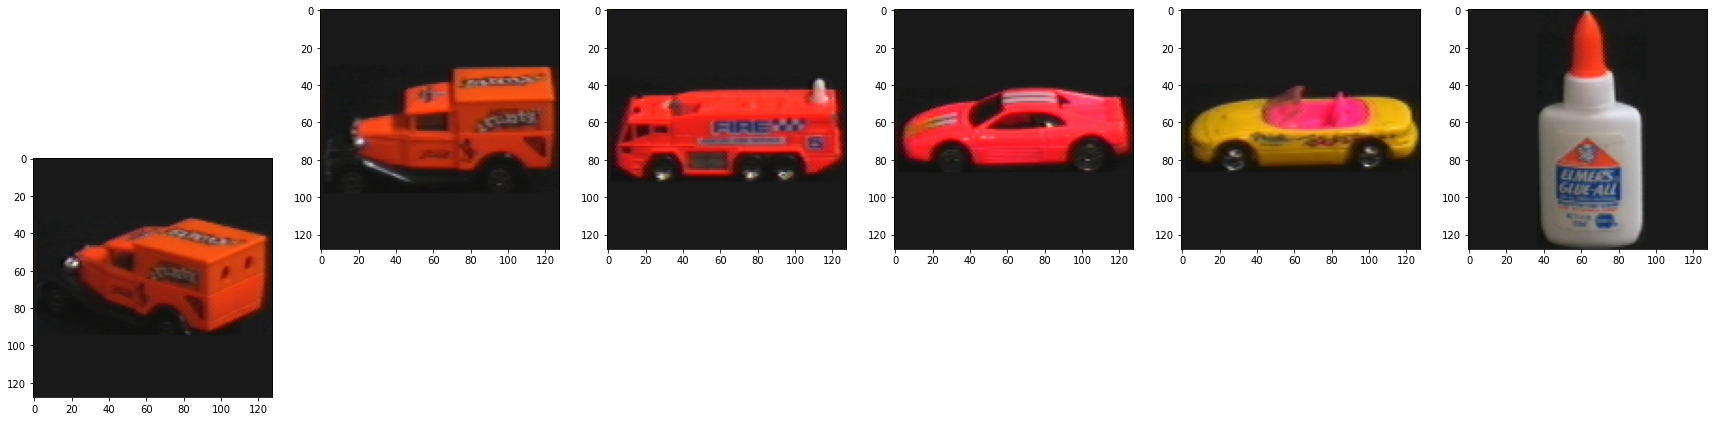

Plot for query image: 1


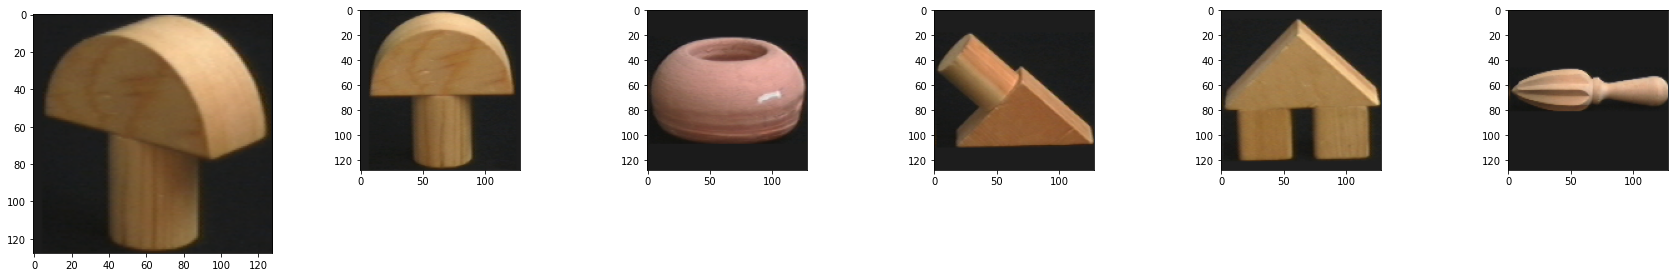

Plot for query image: 2


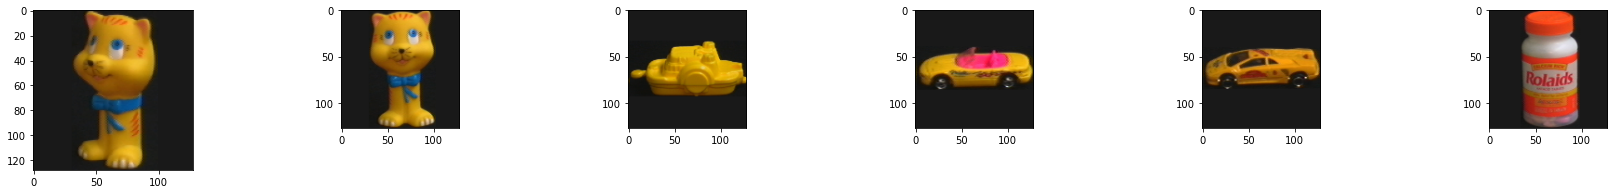

<Figure size 2160x720 with 0 Axes>

In [22]:
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

In [11]:
histograms = ['grayvalue', 'rgb', 'rg']
distances = ['chi2', 'l2', 'intersect']
n_bins = [3, 5, 10, 17, 20, 30, 40, 50]

In [12]:
combinations = []
for hist_type in histograms:
    for dist_type in distances:
        for num_bins in n_bins:
            combinations.append(hist_type + '-' + dist_type + '-' + str(num_bins))

In [13]:
combinations = []
rates = []
for hist_type in histograms:
    for dist_type in distances:
        for num_bins in n_bins:
            print(hist_type + '-' + dist_type + '-' + str(num_bins))
            [best_match, D] = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)
            num_correct = sum( best_match == range(len(query_images)) )
            recognition_rate = num_correct / len(query_images)
            print('Histogram type: ', hist_type, 'Distance type: ', dist_type, 'Number of bins: ', 
                  num_bins, 'Recognition rate: ', recognition_rate)
            combinations.append(hist_type + '-' + dist_type + '-' + str(num_bins))
            rates.append(recognition_rate)

grayvalue-chi2-3
Histogram type:  grayvalue Distance type:  chi2 Number of bins:  3 Recognition rate:  0.0
grayvalue-chi2-5
Histogram type:  grayvalue Distance type:  chi2 Number of bins:  5 Recognition rate:  0.011235955056179775
grayvalue-chi2-10
Histogram type:  grayvalue Distance type:  chi2 Number of bins:  10 Recognition rate:  0.0
grayvalue-chi2-17
Histogram type:  grayvalue Distance type:  chi2 Number of bins:  17 Recognition rate:  0.0
grayvalue-chi2-20
Histogram type:  grayvalue Distance type:  chi2 Number of bins:  20 Recognition rate:  0.0
grayvalue-chi2-30
Histogram type:  grayvalue Distance type:  chi2 Number of bins:  30 Recognition rate:  0.0
grayvalue-chi2-40
Histogram type:  grayvalue Distance type:  chi2 Number of bins:  40 Recognition rate:  0.0
grayvalue-chi2-50
Histogram type:  grayvalue Distance type:  chi2 Number of bins:  50 Recognition rate:  0.0
grayvalue-l2-3
Histogram type:  grayvalue Distance type:  l2 Number of bins:  3 Recognition rate:  0.0
grayvalue-l2

KeyboardInterrupt: 

In [16]:
dist_type = 'intersect';
hist_type = 'dxdy';
num_bins = 30;

[best_match, D] = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)

1.891933067517711 1.851188288571793 0.4
1.6081096896417402 2.2627942969816486 0.4
1.2012481080390838 2.6112112609557645 0.4
0.7823131170237457 2.8751249613080994 0.4
0.43769322704059016 3.0540081951737714 0.4
0.20379706671950343 3.162506361021848 0.4
0.07211273015877784 3.2213934672468287 0.4
0.01158570541447658 3.2499932732551864 0.4
-0.009894344360730608 3.2624226977100697 0.4
-0.014642206684874863 3.267256445743512 0.4
-0.004306423909538819 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.267256445743512 0.4
1.1777191316947994e-16 3.2672564457

2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.38777

2.0786164476407637e-16 -1.3877787807814457e-16 0.4
-0.03687423992756242 2.706168622523819e-16 0.4
-0.12115677023367168 -5.620504062164855e-16 0.4
-0.29084733170924804 1.1796119636642288e-16 0.4
-0.5903274685246206 6.938893903907228e-18 0.4
-1.0501486364536616 6.938893903907228e-17 0.4
-1.6566421886798883 3.95516952522712e-16 0.4
-2.3277306166542893 4.5102810375396984e-17 0.4
-2.918374685329887 8.326672684688674e-17 0.4
-3.267256445743511 -1.734723475976807e-16 0.4
3.267256445743512 4.5102810375396984e-17 0.4
2.9183746853298875 -2.463307335887066e-16 0.4
2.3277306166542897 3.0184188481996443e-16 0.4
1.6566421886798883 1.8735013540549517e-16 0.4
1.0501486364536616 -4.787836793695988e-16 0.4
0.590327468524621 6.938893903907228e-18 0.4
0.2908473317092483 1.1796119636642288e-16 0.4
0.12115677023367197 -5.620504062164855e-16 0.4
0.03687423992756255 2.706168622523819e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.078616447640763

0.009895704930722261 -0.12553253226664982 0.4
0.03408547623142252 -0.11726554546169307 0.4
0.057184516836741396 -0.10424793427270293 0.4
0.07188111851573481 -0.08867402700898955 0.4
0.07494017061654322 -0.07345123253978839 0.4
0.06605731759739758 -0.060938737536290116 0.4
0.04855661439047579 -0.05202502894601238 0.4
0.026656819562894757 -0.04645402698391368 0.4
0.003983571360940199 -0.04339148805662432 0.4
-0.016357861666204676 -0.04204896017919704 0.4
-0.030820376266962095 -0.04210974521341107 0.4
-0.036155279603872624 -0.04285599291209077 0.4
-0.03146069818602972 -0.043415007080554485 0.4
-0.017044102311987976 -0.04224826625284908 0.4
0.0024268220068040507 -0.038030174912269704 0.4
0.021346863278450555 -0.029964132431659657 0.4
0.034375991170765216 -0.018168896244517146 0.4
0.045288587476893634 -0.0013935156919721303 0.4
0.07247011218392502 0.025517057065083865 0.4
0.14428572392678535 0.07282487082680941 0.4
0.2991753002920922 0.1596191397934977 0.4
0.5832130575864802 0.3218765021371

0.04953048694498029 0.0393295326492384 0.4
0.028916042213397754 0.034503916224641565 0.4
0.025436499824893183 0.026363135071016966 0.4
0.03941971646228045 0.015945525718470528 0.4
0.0404663301088473 0.005370465072956687 0.4
0.03558460366876969 -0.0031233661243449534 0.4
0.03376113298569932 -0.008887725455442856 0.4
0.036516535078166164 -0.011818036978530226 0.4
0.04224003394820242 -0.012561195286630557 0.4
0.05001047862259221 -0.011743276674423167 0.4
0.05887060440056101 -0.009448586323611147 0.4
0.06561824032890555 -0.0051808367837847605 0.4
0.06882885143884956 0.0016393352283397347 0.4
0.07003842417653407 0.01115302968180417 0.4
0.06978969127821734 0.021791441966761152 0.4
0.07039385907694834 0.03095202085325914 0.4
0.07211126509611603 0.036563993839607435 0.4
0.07427785156610038 0.037405249076127696 0.4
0.07645581260656266 0.03354619137538295 0.4
0.07857575973106647 0.02724707257553293 0.4
0.08166697147462247 0.02067865452547101 0.4
0.08837536176013432 0.015751534915319533 0.4
0.100

0.6722048960717377 -2.396395300381907 0.4
0.6939140835350774 -2.1096400448908716 0.4
0.7076600487820008 -1.8732372996893172 0.4
0.7584399178529361 -1.7028219951477954 0.4
0.8482554218358044 -1.59197643440678 0.4
0.9343313655953787 -1.5207370266545093 0.4
0.9420299903762607 -1.4708231959386415 0.4
0.8240215989263494 -1.4334753786789796 0.4
0.6012337598843069 -1.4060643349549928 0.4
0.3293676889997034 -1.3930635303262564 0.4
0.0716145920740013 -1.402386305841832 0.4
-0.13804512413846198 -1.4400134072806394 0.4
-0.29190917314559167 -1.511610680329965 0.4
-0.37585215611961287 -1.6202571280041438 0.4
-0.3598302862964102 -1.75529559593233 0.4
-0.22308673014941224 -1.8864989167884811 0.4
0.006735110495287316 -1.971741571037879 0.4
0.23558168472949745 -1.975912587849409 0.4
0.30505791940470545 -1.8851372307608705 0.4
0.03752356555365218 -1.7115187211309197 0.4
-0.7431900247583779 -1.4907297435653442 0.4
-2.066712079158123 -1.2627166832463255 0.4
-3.8495334732280324 -1.0533256808712574 0.4
-5.8

1.2464694317330791 0.08611672024222937 0.4
0.43434230207588986 -0.6741128914369955 0.4
0.019758241995612446 -1.369191025266449 0.4
-0.11170433653014217 -1.9540109008806092 0.4
-0.08641969733847162 -2.417128941562257 0.4
-0.016155404253757 -2.7684598442256454 0.4
0.01713724820965449 -3.0233689321831783 0.4
-0.061788412380527964 -3.1885304493799436 0.4
-0.3361157708472482 -3.2530666627389095 0.4
-0.842958025556148 -3.191383566854628 0.4
-1.577743324970342 -2.9708481374119633 0.4
-2.4551040586606674 -2.5626414275691407 0.4
-3.327956709303731 -1.9592990509219803 0.4
-4.017605061471165 -1.1892573285301493 0.4
-4.369051619342831 -0.3164075351178816 0.4
-4.305622421172511 0.573429052456826 0.4
-3.8576713165157512 1.3970600552972539 0.4
-3.13765449619626 2.094429296300787 0.4
-2.286194518874022 2.6376759144425415 0.4
-1.4354209334798285 3.0272105437571226 0.4
-0.683203924813197 3.2828838075392133 0.4
-0.11718297959278215 3.440473915957259 0.4
0.18758481933796212 3.5472877990500056 0.4
0.181845

0.8879815611088231 -0.10476659048740497 0.4
1.0693862287527653 -0.09016097244585139 0.4
1.0080696208366589 -0.10525995197944349 0.4
0.7241506105142718 -0.1664267760041419 0.4
0.2951912262436094 -0.28383435440269195 0.4
-0.17156385589107248 -0.4565528695997188 0.4
-0.5743946978851544 -0.6702069318497722 0.4
-0.8396769912400943 -0.8990430466384025 0.4
-0.933805810453113 -1.1147490169645204 0.4
-0.8712487084658355 -1.2947441102718265 0.4
-0.7059984873985553 -1.429115667857859 0.4
-0.5078341838295507 -1.5218547289012065 0.4
-0.33745150688396197 -1.5853470979283464 0.4
-0.23438388206363106 -1.6333571998839194 0.4
-0.2039206361074189 -1.6756069969255827 0.4
-0.22098094553058123 -1.7152879740707097 0.4
-0.25350035175532104 -1.748353456660649 0.4
-0.26698584495590244 -1.765111180073183 0.4
-0.24075337676408032 -1.7525089571811336 0.4
-0.17926607217775567 -1.6957707298021745 0.4
-0.11879950492170657 -1.5839925609918644 0.4
-0.11033660312861242 -1.4125368983557176 0.4
-0.18387679997651785 -1.185

-1.6341233066565706 0.2686586276208367 0.4
-1.8685489563029163 0.24425222586017825 0.4
-1.9223282178289205 -0.013247886264154629 0.4
-1.7917005227986067 -0.4816215883573429 0.4
-1.5181115116418047 -1.1150515907138143 0.4
-1.1731464667437643 -1.8506427159254142 0.4
-0.8319286208566886 -2.61900573932391 0.4
-0.5494856923085852 -3.3561135487387723 0.4
-0.3501177711154643 -4.012639468117293 0.4
-0.23074067492912947 -4.5596895397876995 0.4
-0.1688191271935504 -4.989647018475216 0.4
-0.13732386083299697 -5.31149329510874 0.4
-0.1170846147157296 -5.544478733101533 0.4
-0.09821970572891825 -5.710495662479355 0.4
-0.07865183996087116 -5.829860376760919 0.4
-0.059875842127884285 -5.918461206616027 0.4
-0.045174897116835706 -5.986404511269484 0.4
-0.03536794895437901 -6.040148402265211 0.4
-0.03179847415620193 -6.083632028912945 0.4
-0.034824362099585955 -6.118952200476462 0.4
-0.0427878566436028 -6.146514954446081 0.4
-0.05649725946401667 -6.16596351908184 0.4
-0.0778936013516833 -6.175651571623

-0.09445354538528686 -0.07905111768257148 0.4
-0.13215605661815397 0.00922879219117255 0.4
-0.14984815514901736 0.1054095964860699 0.4
-0.14974946895961144 0.19937689579576245 0.4
-0.13610753460745154 0.2836469304748748 0.4
-0.11202219991034032 0.3540212230846725 0.4
-0.07940461266928162 0.40852172445583806 0.4
-0.04131745037185134 0.44685297156095555 0.4
-0.004400921810299647 0.4705496901531151 0.4
0.02394263231962236 0.4826092136715696 0.4
0.03673929144609097 0.48755029970120534 0.4
0.032122542922785595 0.4909812334603113 0.4
0.013619021797789432 0.4977285195488085 0.4
-0.010904790261626959 0.5107405425862466 0.4
-0.03233323771383289 0.5300727105326627 0.4
-0.045333181930019784 0.5532877066850204 0.4
-0.0490976334364923 0.5769594356564994 0.4
-0.046433748212740746 0.5981682022275178 0.4
-0.04045250587152054 0.6155395441787788 0.4
-0.03354945024121708 0.629459132577294 0.4
-0.026381695645990088 0.6409543494670578 0.4
-0.018534378695542968 0.65111132736463 0.4
-0.008786585748630749 0.6

2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.3877787807814457e-16 0.4
2.0786164476407637e-16 -1.38777

2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367175 0.4
2.0676336812529463e-16 -0.12115677023367

1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.9381167532017797e-16 2.513949065986634 0.4
1.93811675

0.8514590244716335 8.897271425430421 0.4
0.8198708918819488 9.272957409612697 0.4
0.7725135776873199 9.624711695209022 0.4
0.7124516266840372 9.948938477251746 0.4
0.6440215600016164 10.24258563978448 0.4
0.5703235849556411 10.503529318718359 0.4
0.4934235365713638 10.72963619330092 0.4
0.41446487828391404 10.919143576391992 0.4
0.3342302127180958 11.070663704271492 0.4
0.2533629153924389 11.183757539590623 0.4
0.1734590860906569 11.258843072721515 0.4
0.09527293243633754 11.297758563036522 0.4
0.01985468662225463 11.30281407400104 0.4
-0.05207010941397754 11.27666043045722 0.4
-0.1196299527954801 11.222113755486518 0.4
-0.18168617769850204 11.14162901190428 0.4
-0.23829725352692013 11.037615997562206 0.4
-0.2898568067900449 10.911925073651659 0.4
-0.3382558123076898 10.765673883326643 0.4
-0.3867737463509888 10.598726753909705 0.4
-0.4390234634406961 10.41002865219783 0.4
-0.49815471343305456 10.196782723709912 0.4
-0.565155168208802 9.955391037183766 0.4
-0.6374630630500153 9.6826691

10.640199428142601 20.725054740403476 0.4
9.904868692836507 20.704224594428254 0.4
9.069464323774765 20.283905651819552 0.4
8.190508384866927 19.53345994041206 0.4
7.317329507775747 18.525967304540256 0.4
6.484827095219113 17.330119298217582 0.4
5.715588188719171 16.00608592179281 0.4
5.0160418463821 14.604446367336807 0.4
4.377012270151339 13.167322159530876 0.4
3.78125218531709 11.729759507870957 0.4
3.211970813153512 10.321800421842646 0.4
2.6579078785812746 8.968994430076016 0.4
2.1175151318032444 7.692374118257968 0.4
1.6047291371905072 6.5073870147296455 0.4
1.1371196495393396 5.4230105753262166 0.4
0.7293178303636244 4.4430381725025745 0.4
0.3906463224475342 3.566377493035806 0.4
0.11731462064346379 2.787885212220633 0.4
-0.09907774847421812 2.0998974293177004 0.4
-0.2772605349706546 1.4935437940610627 0.4
-0.43392419914742847 0.9598416918651627 0.4
-0.5813780090196723 0.4923874527348551 0.4
-0.7322593259802904 0.08712716831520746 0.4
-0.8899015574564493 -0.2576947168785838 0.4


-1.0518704569131625 -0.9236635383104925 0.4
-1.0430043541426142 -0.8806184813557865 0.4
-1.0330168344529416 -0.8394047927988946 0.4
-1.020916595919699 -0.7988478981138069 0.4
-1.0095586242059664 -0.757582501200706 0.4
-1.0005454478022409 -0.7145209887121708 0.4
-0.9948672365783897 -0.6694958436161571 0.4
-0.991358435322283 -0.6237116702121337 0.4
-0.9893172450406723 -0.5791019809950801 0.4
-0.9910529806227697 -0.5379416552340751 0.4
-0.997122989456035 -0.5015215323842457 0.4
-1.0085415789397845 -0.4692474506514477 0.4
-1.0203324542408474 -0.439414672583689 0.4
-1.0261226277687616 -0.40931705258465284 0.4
-1.0200971545485984 -0.37686016200606487 0.4
-0.9978121885545372 -0.34069329985626706 0.4
-0.9594836800742983 -0.29945813130333077 0.4
-0.9073629456793562 -0.25172722634275746 0.4
-0.8454805626417414 -0.19477048035105565 0.4
-0.7777130345365775 -0.12488292302075008 0.4
-0.7081703251264403 -0.03803883913155548 0.4
-0.6437423050860864 0.07011857797611054 0.4
-0.588600151199833 0.20411154

IndexError: index -36 is out of bounds for axis 0 with size 30

In [14]:
num_correct = sum( best_match == range(len(query_images)) )
print('number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(query_images)))

number of correct matches: 65 (0.730337)



In [9]:
def dist_intersect(x,y):
    
    minima = []
    
    for i in range(len(x)):
        
        minima.append(min(x[i], y[i]))
        
    intersect = 1/2*(np.array(minima).sum()/x.sum() + np.array(minima).sum()/y.sum())
    
    result = 1 - intersect
    
    return result

In [7]:
print('Distance according to dist_interset %f'% dist_intersect(hist1_rgb,hist2_rgb))

Distance according to dist_interset 0.293152


In [8]:
def dist_l2(x, y):
    
    l2_distance = ((x - y)**2).sum()
    
    return l2_distance

In [15]:
print('Distance according to dist_l2 %f'% dist_l2(hist1_rgb, hist2_rgb))

Distance according to dist_l2 0.003344


In [7]:
def dist_chi2(x,y):
    
    num = (x - y)**2
    den = x + y
    
    chi2_distance = []
    
    for i in range(len(num)):
        if den[i] == 0 and num[i] == 0:
            chi2_distance.append(0)
        elif den[i] == 0 and num[i] != 0:
            return np.inf
        else:
            chi2_distance.append(num[i]/den[i])
    
    chi2_distance = np.array(chi2_distance).sum()
    
    return chi2_distance

In [35]:
print('Distance according to dist_chi2 %f'% dist_chi2(hist_gray1, hist_gray2))

Distance according to dist_chi2 16381.000244
